<a href="https://colab.research.google.com/github/Yaroslav1121/MachineLearning/blob/main/%D0%9B%D0%B0%D0%B1_2_%D0%97%D0%B0%D0%B2%D0%B4_2_%D0%9A%D0%BB%D0%B8%D0%BC%D1%96%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
import pandas as pd

# Підключення Google Drive
drive.mount('/content/drive')

# Читання CSV-файлу з правильним роздільником (кома)
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/tested.csv', sep=',')

# 1. Виведення перших 5 рядків для перевірки
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN      

In [6]:
# 2. Визначити розмір датасета.
df.shape

(418, 12)

In [7]:
# 3. Визначити тип даних.
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [22]:
# 4. Визначити наявність пропущених значень. При наявності, замінити
# пропущені значення на середнє значення.

# Перевіряємо кількість пропущених значень.
df.isnull().sum()



,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [23]:
# Заміняємо пропущені значення на середні.
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [24]:
# Ще раз перевіряємо наявність пропущених значень
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
# 6. Перевірити наявність дублікатів. При наявності видалити дублікати.
df.duplicated().sum()

0

In [12]:
# 7. Вивести описову статистику датасету describe()
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [39]:
# 8. Видалити стовпчик Cabin
df.drop('Cabin', axis=1, inplace=True)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [26]:
# 9. Сформувати датасет з обраними стовпцями:['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
titanic_dts = df[selected_columns]
titanic_dts.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


In [27]:
# 10.Замінити бінарні ознаки (Стать) на 0 і 1

# Перевірка унікальних значень у стовпці 'Sex'
titanic_dts['Sex'].unique()

# Замінюємо значення: 'male' на 1, 'female' на 0
titanic_dts.loc[:, 'Sex'] = titanic_dts['Sex'].map({'male': 1, 'female': 0})

# Перевірка після заміни
titanic_dts['Sex'].unique()

# Виведення перших 5 рядків для перевірки
titanic_dts.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,34.5,7.8292
1,1,3,0,47.0,7.0000
2,0,2,1,62.0,9.6875
3,0,3,1,27.0,8.6625
4,1,3,0,22.0,12.2875


In [28]:
# 11.Ще раз перевірити кількість пропущених даних (впевнитись, що їх немає).
titanic_dts.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0


In [44]:
# 12.Вивести 5 перших рядків датасету.
titanic_dts.head(5)

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,34.5,7.8292
1,1,3,0,47.0,7.0000
2,0,2,1,62.0,9.6875
3,0,3,1,27.0,8.6625
4,1,3,0,22.0,12.2875


In [34]:
# 13. Вивести 5 останніх рядків датасету.
titanic_dts.tail(5)

,Survived,Pclass,Sex,Age,Fare
413,0,3,1,27.0,8.0500
414,1,1,0,39.0,108.9000
415,0,3,1,38.5,7.2500
416,0,3,1,27.0,8.0500
417,0,3,1,27.0,22.3583


In [41]:
# 14.Аналіз виживання залежно від статі: Обчисліть відсоток виживання
# для кожної статі. Чи була різниця у виживанні між чоловіками та жінками?
# Групування за стовпцем 'Sex' і обчислення середнього для 'Survived'
survival_rate = titanic_dts.groupby('Sex')['Survived'].mean() * 100
print(survival_rate)

Sex
0    100.0
1      0.0
Name: Survived, dtype: float64


In [45]:
# 15.Обчисліть відсоток виживання для кожного класу (Pclass). Який
# клас мав найвищий рівень виживання (дати відповідь)?
# Обчислення відсотка виживання для кожного класу
survival_rate_by_class = titanic_dts.groupby('Pclass')['Survived'].mean() * 100

# Виведення відсотка виживання для кожного класу
print("Відсоток виживання для кожного класу:")
print(survival_rate_by_class)
# Отже найвищий відсоток виживання мав 1 клас

Відсоток виживання для кожного класу:
Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64


In [46]:
# 16. Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи
# впливає вік на виживання (дати відповідь)?
# Обчислення середнього віку для тих, хто вижив і хто не вижив
average_age_survived = titanic_dts[titanic_dts['Survived'] == 1]['Age'].mean()
average_age_not_survived = titanic_dts[titanic_dts['Survived'] == 0]['Age'].mean()

# Виведення результатів
print(f"Середній вік тих, хто вижив: {average_age_survived:.2f} років")
print(f"Середній вік тих, хто не вижив: {average_age_not_survived:.2f} років")
# Виявляється що вік не впливає на відсоток виживання

Середній вік тих, хто вижив: 29.73 років
Середній вік тих, хто не вижив: 29.52 років


In [51]:
# 17. Розподіліть пасажирів на групи за рівнями тарифів (Fare) і
# обчисліть рівень виживання для кожної групи. Як тариф впливав на
# шанси виживання (дати відповідь)?

# Визначення меж для групування тарифів
bins = [0, 10, 20, 30, 40, 50, 60, 100]  # Наприклад, тарифні групи
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+']

# Створення нової колонки 'FareGroup'
titanic_dts.loc[:, 'FareGroup'] = pd.cut(titanic_dts['Fare'], bins=bins, labels=labels, right=False)

# Обчислення рівня виживання для кожної групи
survival_rate_by_fare_group = titanic_dts.groupby('FareGroup', observed=False)['Survived'].mean() * 100

# Виведення результатів
print("Рівень виживання для кожної групи за тарифами:")
print(survival_rate_by_fare_group)
# Отже тенденція збільшення відсотку виживання зі збільшенням тарифу і справді прослідковується

Рівень виживання для кожної групи за тарифами:
FareGroup
0-10     27.096774
10-20    31.325301
20-30         40.0
30-40         50.0
40-50    28.571429
50-60    52.941176
60+      45.454545
Name: Survived, dtype: object


In [52]:
# 18.Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного
# класу (Pclass). Чи існує значна різниця у тарифах між класами (дати відповідь)?

# Обчислення середнього тарифу для кожного класу
average_fare_by_class = titanic_dts.groupby('Pclass')['Fare'].mean()

# Виведення результатів
print("Середній тариф (Fare) для кожного класу (Pclass):")
print(average_fare_by_class)
# Різниця і справді значна

Середній тариф (Fare) для кожного класу (Pclass):
Pclass
1    94.280297
2    22.202104
3    12.468827
Name: Fare, dtype: float64


In [54]:
# 19. Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік
# пасажирів розподіляється за класами (дати відповідь)?
average_age_by_class = titanic_dts.groupby('Pclass')['Age'].mean()

# Виведення результатів
print("Середній вік пасажирів для кожного класу (Pclass):")
print(average_age_by_class)
# Можна зробити висновок що чим старше пасажири тим вище клас

Середній вік пасажирів для кожного класу (Pclass):
Pclass
1    39.747664
2    28.681935
3    25.009541
Name: Age, dtype: float64


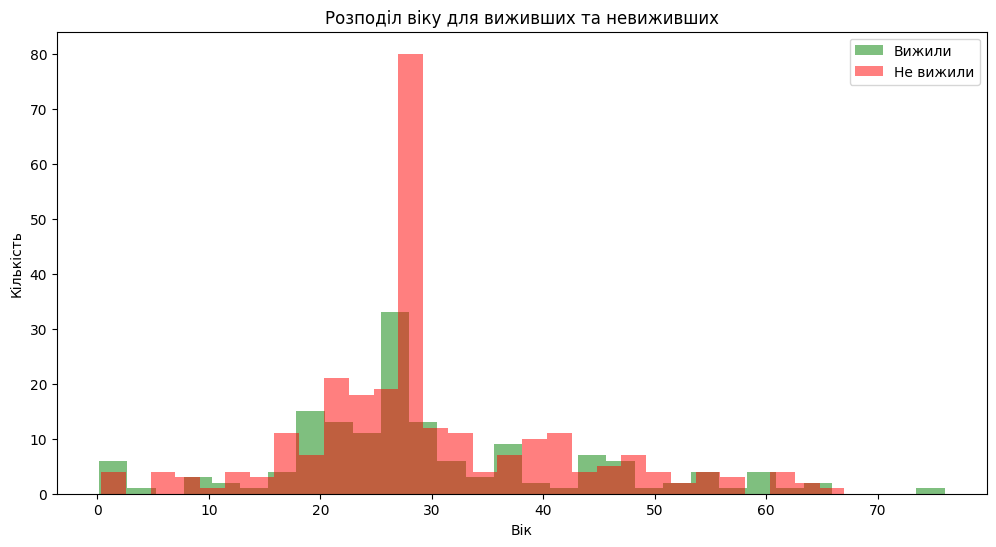

In [57]:
# 20.Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто
# не вижив. Чи є видимі відмінності у вікових групах (дати відповідь)?
import matplotlib.pyplot as plt

survived = titanic_dts[titanic_dts['Survived'] == 1]['Age'].dropna()
not_survived = titanic_dts[titanic_dts['Survived'] == 0]['Age'].dropna()

# Побудова гістограми
plt.figure(figsize=(12, 6))
plt.hist(survived, bins=30, alpha=0.5, label='Вижили', color='green')
plt.hist(not_survived, bins=30, alpha=0.5, label='Не вижили', color='red')

# Додавання підписів та заголовка
plt.title('Розподіл віку для виживших та невиживших')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.legend()

# Показати гістограму
plt.show()

In [58]:
# 21. Обчисліть відсоток виживання для кожної комбінації статі та класу
# (наприклад, жінки в 1-му класі, чоловіки в 3-му класі). Яка група
# мала найвищий рівень виживання (дати відповідь)?
# Обчислення відсотка виживання для кожної комбінації статі та класу
survival_rate_by_sex_class = titanic_dts.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100

# Виведення результатів
print("Відсоток виживання для кожної комбінації статі та класу:")
print(survival_rate_by_sex_class)

# Визначення групи з найвищим рівнем виживання
highest_survival_group = survival_rate_by_sex_class.idxmax()
highest_survival_rate = survival_rate_by_sex_class.max()

Відсоток виживання для кожної комбінації статі та класу:
Sex  Pclass
0    1         100.0
     2         100.0
     3         100.0
1    1           0.0
     2           0.0
     3           0.0
Name: Survived, dtype: object


In [59]:
# 22.Обчисліть кореляцію між усіма числовими змінними (Survived,
# Pclass, Age, Fare). Які змінні найбільш сильно корелюють з
# виживанням (дати відповідь)?

# Обчислення кореляції між числовими змінними
correlation_matrix = titanic_dts[['Survived', 'Pclass', 'Age', 'Fare']].corr()

# Виведення матриці кореляції
print("Матриця кореляції:")
print(correlation_matrix)

# Визначення змінних, які найбільш сильно корелюють з виживанням
survived_correlations = correlation_matrix['Survived']
strongest_correlation = survived_correlations.abs().idxmax()
strongest_correlation_value = survived_correlations[strongest_correlation]

Матриця кореляції:
          Survived    Pclass       Age      Fare
Survived  1.000000 -0.108615  0.008035  0.192036
Pclass   -0.108615  1.000000 -0.467853 -0.577313
Age       0.008035 -0.467853  1.000000  0.342357
Fare      0.192036 -0.577313  0.342357  1.000000
